In [1]:
import tensorflow 
from tensorflow.keras.datasets import mnist

In [6]:
(X_train_full,y_train_full) , (X_test,y_test) = mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_test[0].shape

(28, 28)

In [10]:
#create a validation  data set from the full training data 
#scale the data between 0 and 1 by dividing it by 255 as its an unsigned data between 0-255 range
X_valid , X_train = X_train_full[:5000]/255 , X_train_full[5000:]/255
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

#Scale the test as well 
X_test = X_test/255

In [11]:
len(X_train)

55000

In [12]:
len(X_valid)

5000

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

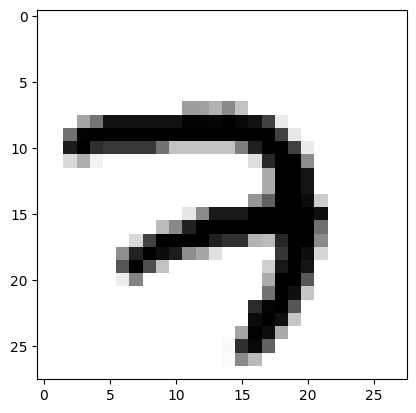

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<Axes: >

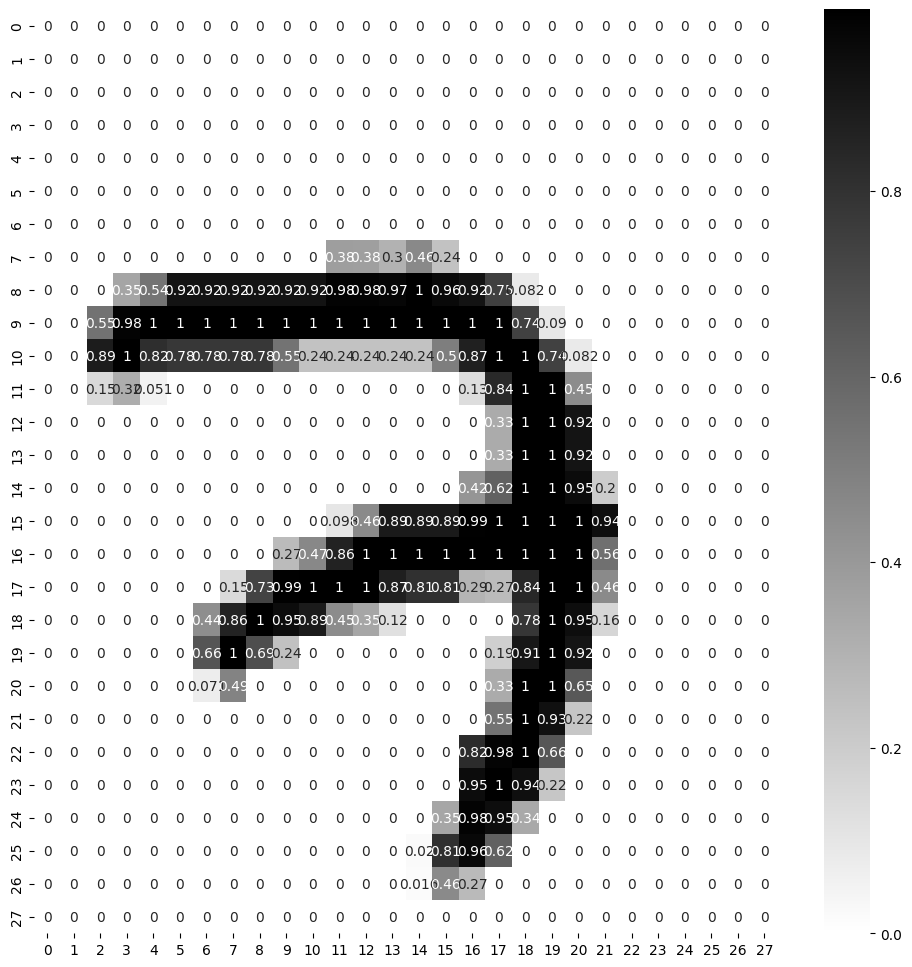

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [19]:
#Layers 

Layers = [tensorflow.keras.layers.Flatten(input_shape=[28,28],name = 'InputLayer'),
          tensorflow.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
          tensorflow.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
          tensorflow.keras.layers.Dense(10,activation='softmax',name='OutputLayer')]

model_clf = tensorflow.keras.models.Sequential(Layers)

c:\Users\prati\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model_clf.layers

[<Flatten name=InputLayer, built=True>,
 <Dense name=HiddenLayer1, built=True>,
 <Dense name=HiddenLayer2, built=True>,
 <Dense name=OutputLayer, built=True>]

In [21]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_clf.compile(loss=['sparse_categorical_crossentropy'],optimizer='SGD',metrics=['acc'])

In [24]:
history = model_clf.fit(X_train,y_train,epochs=20,validation_data=[X_valid, y_valid], batch_size=32)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9870 - loss: 0.0473 - val_acc: 0.9778 - val_loss: 0.0766
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9884 - loss: 0.0436 - val_acc: 0.9792 - val_loss: 0.0718
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9893 - loss: 0.0419 - val_acc: 0.9780 - val_loss: 0.0724
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.9900 - loss: 0.0395 - val_acc: 0.9798 - val_loss: 0.0709
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.9909 - loss: 0.0366 - val_acc: 0.9800 - val_loss: 0.0700
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9915 - loss: 0.0348 - val_acc: 0.9794 - val_loss: 0.0726
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9919 - loss: 0.0331 - val_acc: 0.9790 - val_loss: 0.0675
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9923 - loss: 0.0320 - val_acc: 0.9814 - val_loss: 0.0667
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━

In [25]:
history.params

{'verbose': 'auto', 'epochs': 20, 'steps': 1719}

In [27]:
import pandas as pd 
pd.DataFrame(history.history)

,acc,loss,val_acc,val_loss
0,0.987145,0.047950,0.9778,0.076566
1,0.987909,0.045210,0.9792,0.071799
2,0.989000,0.042778,0.9780,0.072400
3,0.989545,0.040126,0.9798,0.070945
4,0.990382,0.037878,0.9800,0.069978
5,0.991018,0.035787,0.9794,0.072638
6,0.991709,0.033750,0.9790,0.067541
7,0.992473,0.031718,0.9814,0.066710
8,0.993091,0.029922,0.9804,0.066978
9,0.993673,0.028356,0.9792,0.070140


<Axes: >

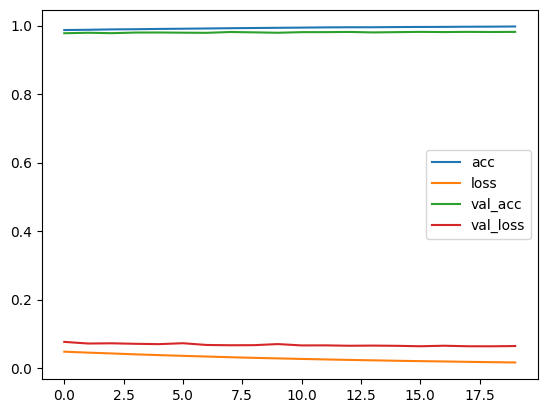

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model_clf.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9756 - loss: 0.0796


[0.0677732452750206, 0.9793000221252441]

In [31]:
X_new = X_test[:3]

In [32]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

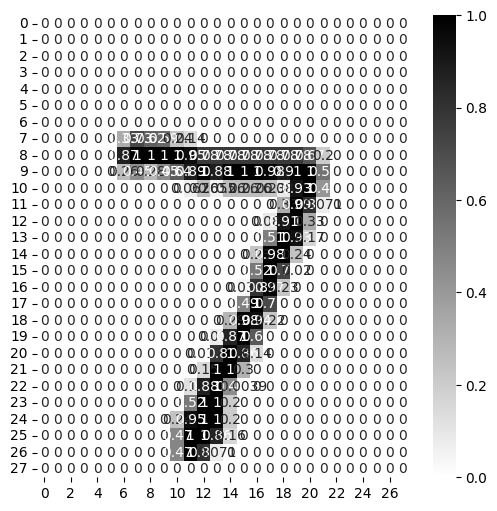

In [36]:
plt.figure(figsize=(6,6))
sns.heatmap(X_test[0],annot=True,cmap='binary')

<Axes: >

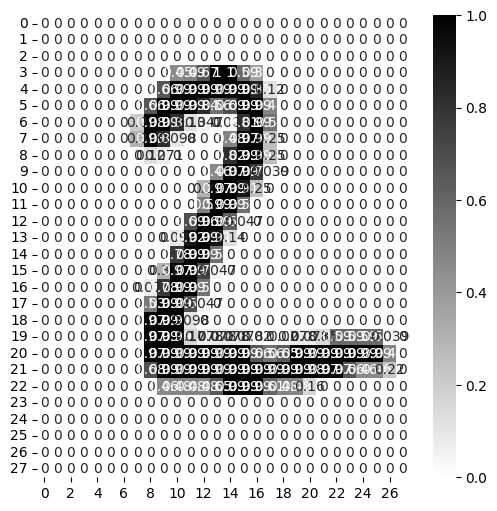

In [37]:
plt.figure(figsize=(6,6))
sns.heatmap(X_test[1],annot=True,cmap='binary')

<Axes: >

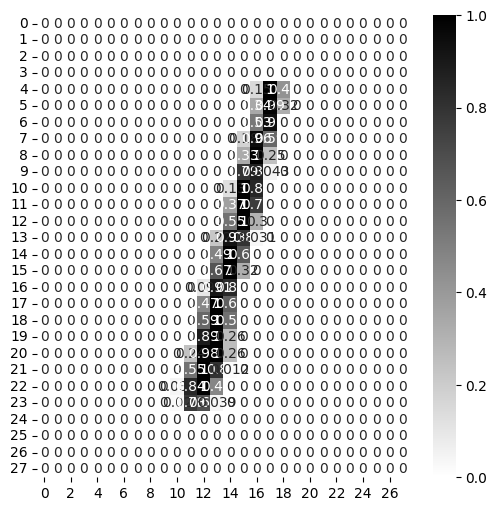

In [38]:
plt.figure(figsize=(6,6))
sns.heatmap(X_test[2],annot=True,cmap='binary')

In [40]:
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

In [41]:
y_prob

array([[1.5344037e-06, 2.2729955e-06, 2.6275575e-05, 7.2766986e-04,
        3.6683834e-09, 3.8159158e-07, 4.4811661e-13, 9.9916160e-01,
        6.7341043e-06, 7.3556861e-05],
       [3.6458289e-08, 3.1487831e-05, 9.9995720e-01, 8.3791756e-06,
        7.4114272e-14, 1.4910381e-07, 1.6038085e-07, 1.7164673e-13,
        2.6238370e-06, 1.0707982e-15],
       [6.4613454e-07, 9.9849057e-01, 1.3484088e-04, 2.9955971e-05,
        1.7661329e-04, 1.6546886e-05, 7.9382960e-05, 3.4375835e-04,
        7.2585401e-04, 1.7573338e-06]], dtype=float32)

In [44]:
import numpy as np 
y_pred = np.argmax(y_prob,axis=1)

In [45]:
y_pred

array([7, 2, 1], dtype=int64)

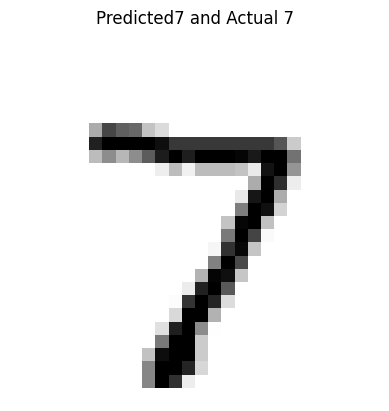

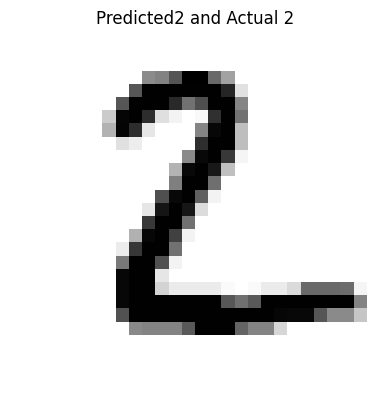

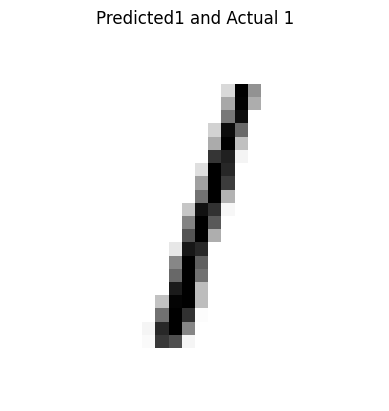

In [47]:
#plot 
for data , pred , actual_data in zip(X_new,y_pred,actual):
    plt.imshow(data,cmap='binary')
    plt.title(f"Predicted{pred} and Actual {actual_data}") 
    plt.axis("off")
    plt.show()
   